In [1]:
%matplotlib inline
from __future__ import unicode_literals
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')
reload(sys)

from matplotlib import  pyplot as plt

from StringIO import StringIO  # got moved to io in python3.

import requests

import seaborn as sns
import pandas as pd
pd.set_option("max_rows", 100)
pd.set_option("max_columns", 100)

sns.set(style="ticks", palette="muted", color_codes=True)


import patsy
import numpy as np
import scipy as sp
import statsmodels as smd
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm


from spartan.utils import spandas as spd

# Load spreadsheets

In [2]:
# get data
table = pd.read_csv("/home/gus/data/undoc/Homicide-counts-and-rates-2000-2013-28-Aug-2015-2141-openrefine.csv")

-----------------

In [3]:
table.head()

,Region,Sub Region,Country/ Territory,Source,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Africa,Eastern Africa,Burundi,CJ CTS,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,376.0,347.0,349.0,451.0,416.0
1,Africa,Eastern Africa,Burundi,CJ CTS,Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4.2,3.8,3.7,4.7,4.2
2,Africa,Eastern Africa,Comoros,PH WHO,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN
3,Africa,Eastern Africa,Comoros,PH WHO,Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
4,Africa,Eastern Africa,Djibouti,PH WHO,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN


In [4]:
rates = table.query("Indicator == 'Rate'").copy()
rates['Country/ Territory'] = rates['Country/ Territory']

In [5]:
rates['Sub Region'].unique()

array(['Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Caribbean', 'Central America',
       'Northern America', 'South America', 'Central Asia', 'Eastern Asia',
       'South-Eastern Asia', 'Southern Asia', 'Western Asia',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Australia and New Zealand', 'Melanesia',
       'Micronesia', 'Polynesia'], dtype=object)

In [6]:
rates['2013'][1]

4.2000000000000002

In [7]:
devd_nations = ['Northern America', 
                'Eastern Europe', 
                'Northern Europe', 
                'Southern Europe', 
                'Western Europe', 
                'Australia and New Zealand']

In [8]:
rates_2012 = rates[["Region","Sub Region","Country/ Territory","Source", "2012"]].dropna()

In [9]:
devd_nations_mask = rates_2012["Sub Region"].apply(lambda x: x in devd_nations)
rates_2012_devd = rates_2012[devd_nations_mask]

In [10]:
rates_2012_devd.sort(columns='Country/ Territory')

,Region,Sub Region,Country/ Territory,Source,2012
353,Europe,Southern Europe,Albania,CJ CTS,5.1
355,Europe,Southern Europe,Andorra,CJ CTS/Interpol,0.0
401,Oceania,Australia and New Zealand,Australia,CJ Eurostat/CTS/NSO,1.1
383,Europe,Western Europe,Austria,CJ CTS/Eurostat,1.0
313,Europe,Eastern Europe,Belarus,CJ CTS/Transmonee,3.6
385,Europe,Western Europe,Belgium,CJ CTS/Eurostat,1.7
175,Americas,Northern America,Bermuda,CJ CTS/National police,7.2
357,Europe,Southern Europe,Bosnia and Herzegovina,CJ CTS,1.6
315,Europe,Eastern Europe,Bulgaria,CJ CTS/Eurostat,1.9
177,Americas,Northern America,Canada,CJ CTS/OAS,1.6


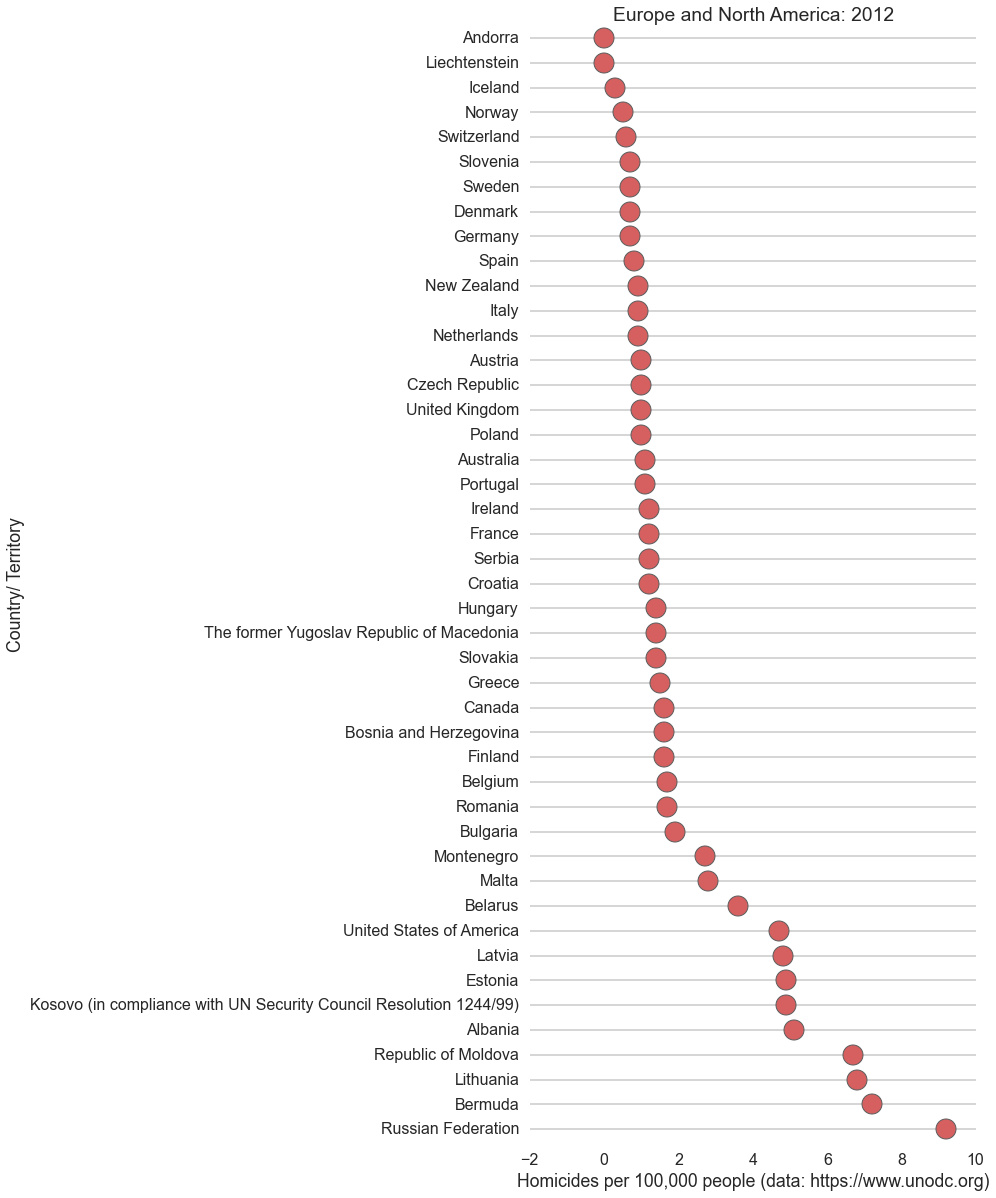

In [41]:
sns.set(style="white", context="poster")
plt.figure(figsize=(8, 20))

g = sns.stripplot(y="Country/ Territory", x="2012", 
                  data=rates_2012_devd.sort(columns='2012'),
                  size=20,
                  orient="h",
                  color='r', edgecolor="gray");

g.axes.yaxis.grid(True)
g.set(xlabel="Homicides per 100,000 people (data: https://www.unodc.org)"
     )

plt.title("Europe and North America: 2012")
sns.despine(left=True, bottom=True)